In [1]:
#Importation des bibliothèques

from dotenv import load_dotenv
import os
import sys
import requests
import json
import logging
import time
import pandas as pd
from pandas import json_normalize
import geopandas as gpd
from io import StringIO
import seaborn as sns
import folium
import json
import requests
import time

In [2]:
import fonctions as f

df = f.pd.read_csv("data.csv", index_col=0)
df

,DATE,RR,DRR,TN,HTN,TX,HTX,TM,TMNX,TNSOL,...,BRUME,ECLAIR,ETPMON,ETPGRILLE,UV,TMERMAX,TMERMIN,HNEIGEF,NEIGETOTX,NEIGETOT06
POSTE,,,,,,,,,,,,,,,,,,,,,
1014002,20220105,"2,6",NaN,"-0,4",1759.0,"3,4",1217.0,"0,9","1,50",NaN,...,NaN,NaN,NaN,"0,4",NaN,NaN,NaN,NaN,0.0,0.0
1014002,20220106,"0,0",NaN,"-2,5",1746.0,"4,3",1327.0,"-0,6","0,90",NaN,...,NaN,NaN,NaN,"0,6",NaN,NaN,NaN,NaN,0.0,0.0
1014002,20220107,"10,0",NaN,"-6,9",718.0,"1,6",2229.0,"-1,2","-2,65",NaN,...,NaN,NaN,NaN,"0,0",NaN,NaN,NaN,NaN,0.0,NaN
1014002,20220108,"13,2",NaN,"-0,7",733.0,"6,3",2319.0,"2,4","2,80",NaN,...,NaN,NaN,NaN,"0,5",NaN,NaN,NaN,NaN,0.0,0.0
1014002,20220109,"7,6",NaN,"0,4",737.0,"2,2",601.0,"1,8","1,30",NaN,...,NaN,NaN,NaN,"0,1",NaN,NaN,NaN,NaN,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1014002,20241027,"0,2",NaN,"5,7",633.0,"21,9",1354.0,"13,3","13,80",NaN,...,NaN,NaN,NaN,"1,1",NaN,NaN,NaN,NaN,0.0,0.0
1014002,20241028,"0,2",NaN,"6,7",546.0,"21,9",1236.0,"12,6","14,30",NaN,...,NaN,NaN,NaN,"1,3",NaN,NaN,NaN,NaN,0.0,0.0
1014002,20241029,"0,4",NaN,"6,4",2251.0,"21,7",1236.0,"12,0","14,05",NaN,...,NaN,NaN,NaN,"1,1",NaN,NaN,NaN,NaN,0.0,0.0


On commence par supprimer les doublons de notre data-frame

In [3]:
#Suppression des doublons
df = df.drop_duplicates()

## Vue d'ensemble sur les variables ##

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1022 entries, 1014002 to 1014002
Data columns (total 68 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   DATE        1022 non-null   int64  
 1   RR          1002 non-null   object 
 2   DRR         0 non-null      float64
 3   TN          1001 non-null   object 
 4   HTN         984 non-null    float64
 5   TX          1002 non-null   object 
 6   HTX         987 non-null    float64
 7   TM          1001 non-null   object 
 8   TMNX        1001 non-null   object 
 9   TNSOL       0 non-null      float64
 10  TN50        0 non-null      float64
 11  DG          996 non-null    float64
 12  TAMPLI      1001 non-null   object 
 13  TNTXM       1001 non-null   object 
 14  PMERM       0 non-null      float64
 15  PMERMIN     0 non-null      float64
 16  FFM         1001 non-null   object 
 17  FXI         1001 non-null   object 
 18  DXI         985 non-null    float64
 19  HXI         984 non-nul

On constate qu'il y'a des variables quantitatives ( de type int et float) et des variables classés de type object, soit qualitatives.En réalité ces variables de type object contiennent des réels mais sont juste classé sous type object car les points dans les nombres décimaux ont été remplacés par la virgule. Mais pour le moment, nous allons le conserver ainsi pour une meilleure analyse (surtout le traitement des valeurs manquantes).

## Détection des valeurs manquantes ##

DATE---------------------------------------------- 0.0
DRR----------------------------------------------- 1.0
HTN----------------------------------------------- 0.03718199608610567
HTX----------------------------------------------- 0.03424657534246575
TNSOL--------------------------------------------- 1.0
TN50---------------------------------------------- 1.0
DG------------------------------------------------ 0.025440313111545987
PMERM--------------------------------------------- 1.0
PMERMIN------------------------------------------- 1.0
DXI----------------------------------------------- 0.036203522504892366
HXI----------------------------------------------- 0.03718199608610567
DXY----------------------------------------------- 0.036203522504892366
HXY----------------------------------------------- 0.03718199608610567
FF2M---------------------------------------------- 1.0
FXI2---------------------------------------------- 1.0
DXI2---------------------------------------------- 1.0
HXI2-

<Axes: ylabel='POSTE'>

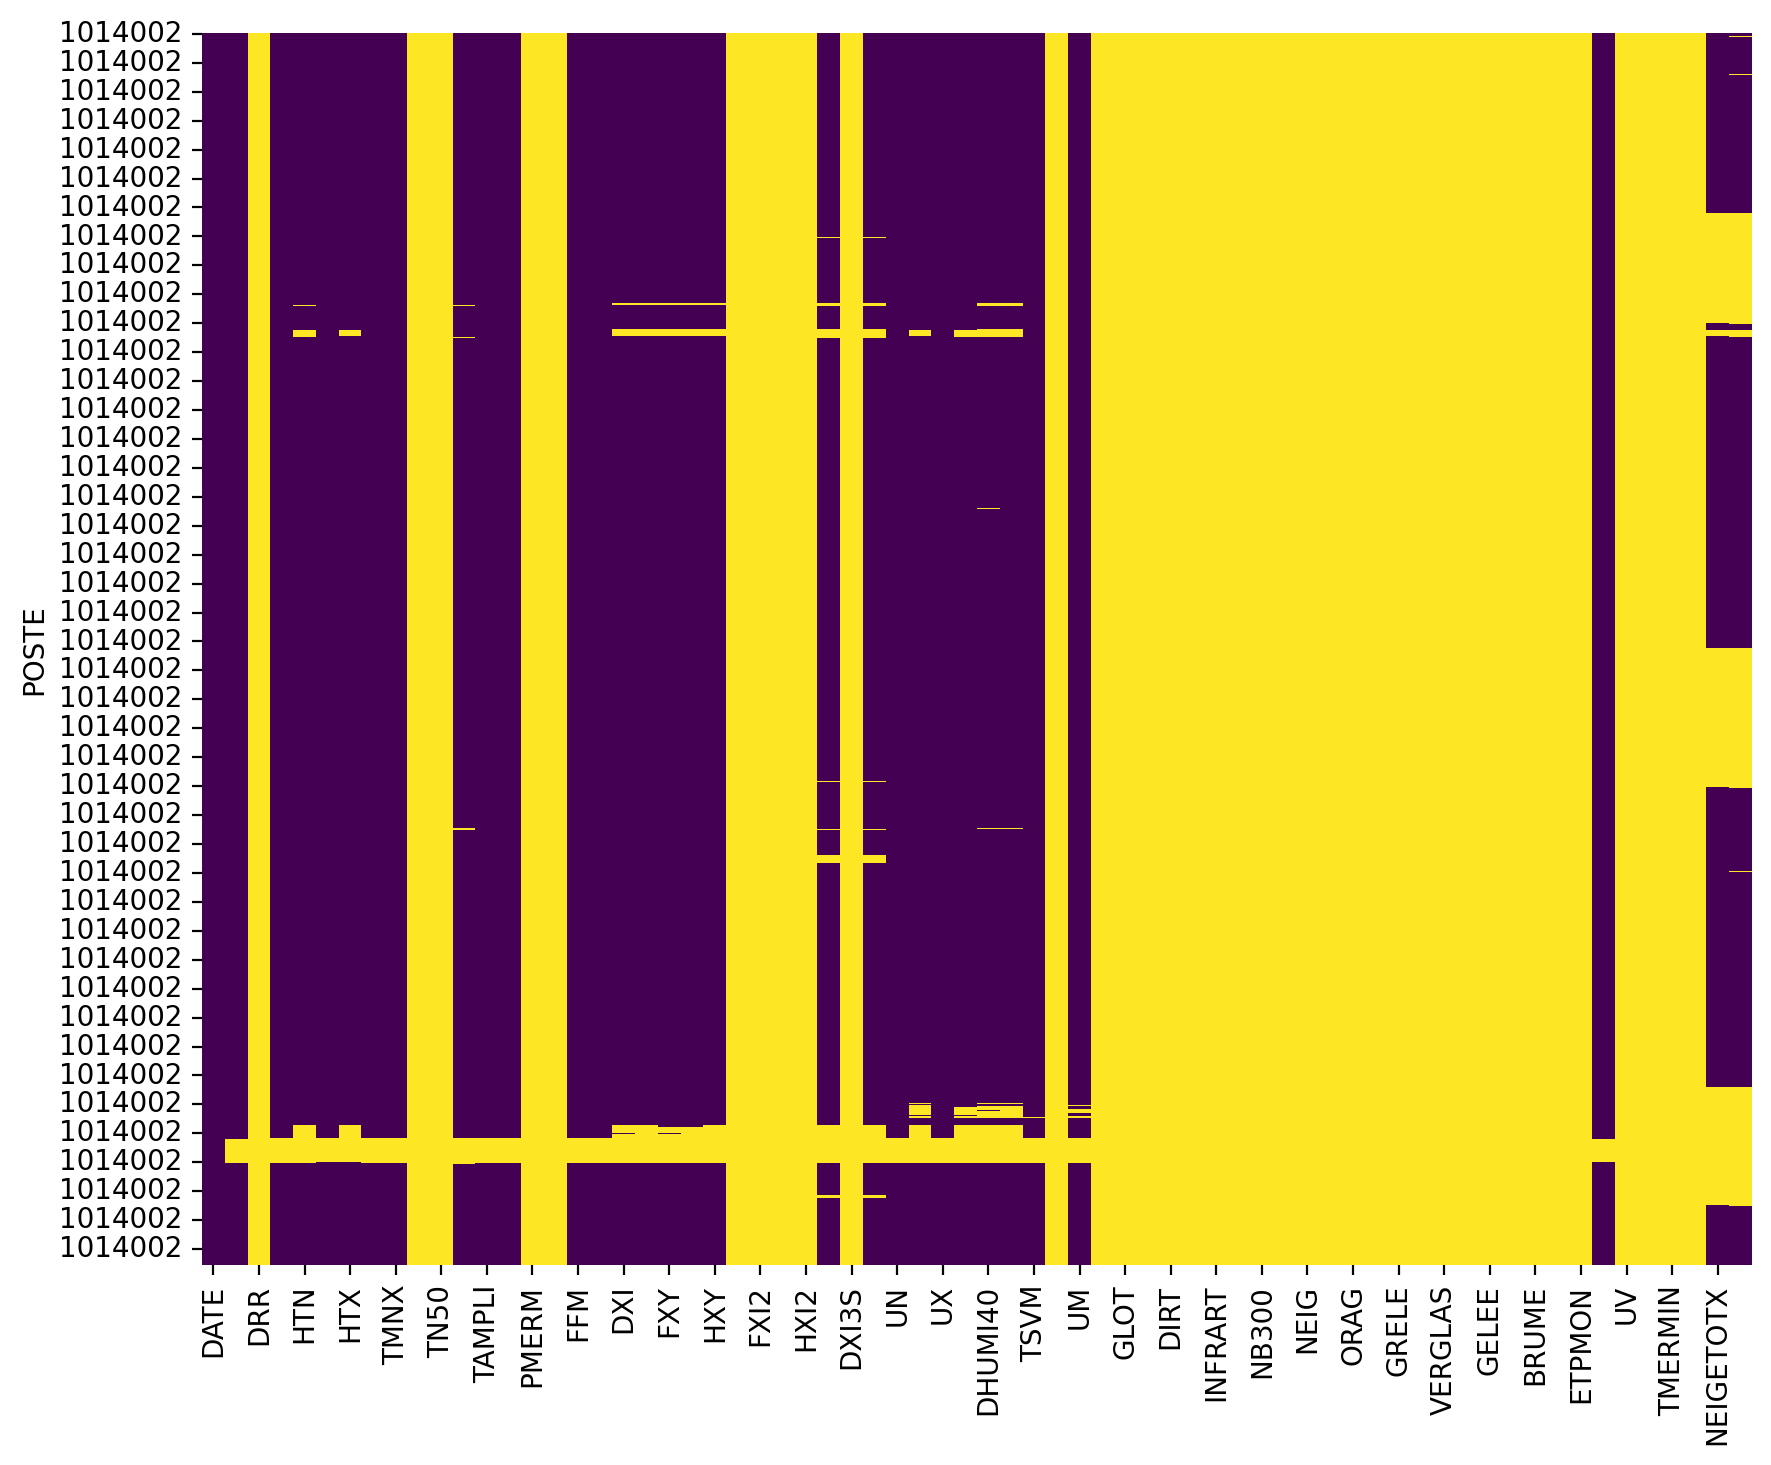

In [5]:
# Data Visualisation Libraries
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'

!pip install seaborn --upgrade
import seaborn as sns

for col in df.select_dtypes(include="number"):
    print(f'{col:-<50} {df[col].isna().sum()/df.shape[0]}') 

# Création de la heatmap des valeurs manquantes
plt.figure(figsize=(10,8))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')

En observant cde heatmap, on se rend compte que toutes les variables ont des valeurs manquantes. Mais cela n'est pas le plus grand constat à faire. On remarque qu'il des variables pour lesquelles toutes les valeurs manquantes. Le premier traitement que nous ferons est de supprimer toutes les variables pour lesquelles toutes les valeurs sont manquantes.

In [6]:
# Suppression des variables avec des valeurs manquantes : 
# Supprimer les colonnes où toutes les valeurs sont NaN
df_cleaned = df.dropna(axis=1, how='all')

print("\nDataFrame après suppression des colonnes vides :")
print(df_cleaned)


DataFrame après suppression des colonnes vides :
             DATE    RR    TN     HTN    TX     HTX    TM   TMNX     DG  \
POSTE                                                                     
1014002  20220105   2,6  -0,4  1759.0   3,4  1217.0   0,9   1,50  389.0   
1014002  20220106   0,0  -2,5  1746.0   4,3  1327.0  -0,6   0,90  964.0   
1014002  20220107  10,0  -6,9   718.0   1,6  2229.0  -1,2  -2,65  674.0   
1014002  20220108  13,2  -0,7   733.0   6,3  2319.0   2,4   2,80   87.0   
1014002  20220109   7,6   0,4   737.0   2,2   601.0   1,8   1,30    0.0   
...           ...   ...   ...     ...   ...     ...   ...    ...    ...   
1014002  20241027   0,2   5,7   633.0  21,9  1354.0  13,3  13,80    0.0   
1014002  20241028   0,2   6,7   546.0  21,9  1236.0  12,6  14,30    0.0   
1014002  20241029   0,4   6,4  2251.0  21,7  1236.0  12,0  14,05    0.0   
1014002  20241030   0,2   4,9   632.0  21,8  1253.0  11,0  13,35    0.0   
1014002  20241031   0,0   2,9   657.0  20,2  1341.

<Axes: ylabel='POSTE'>

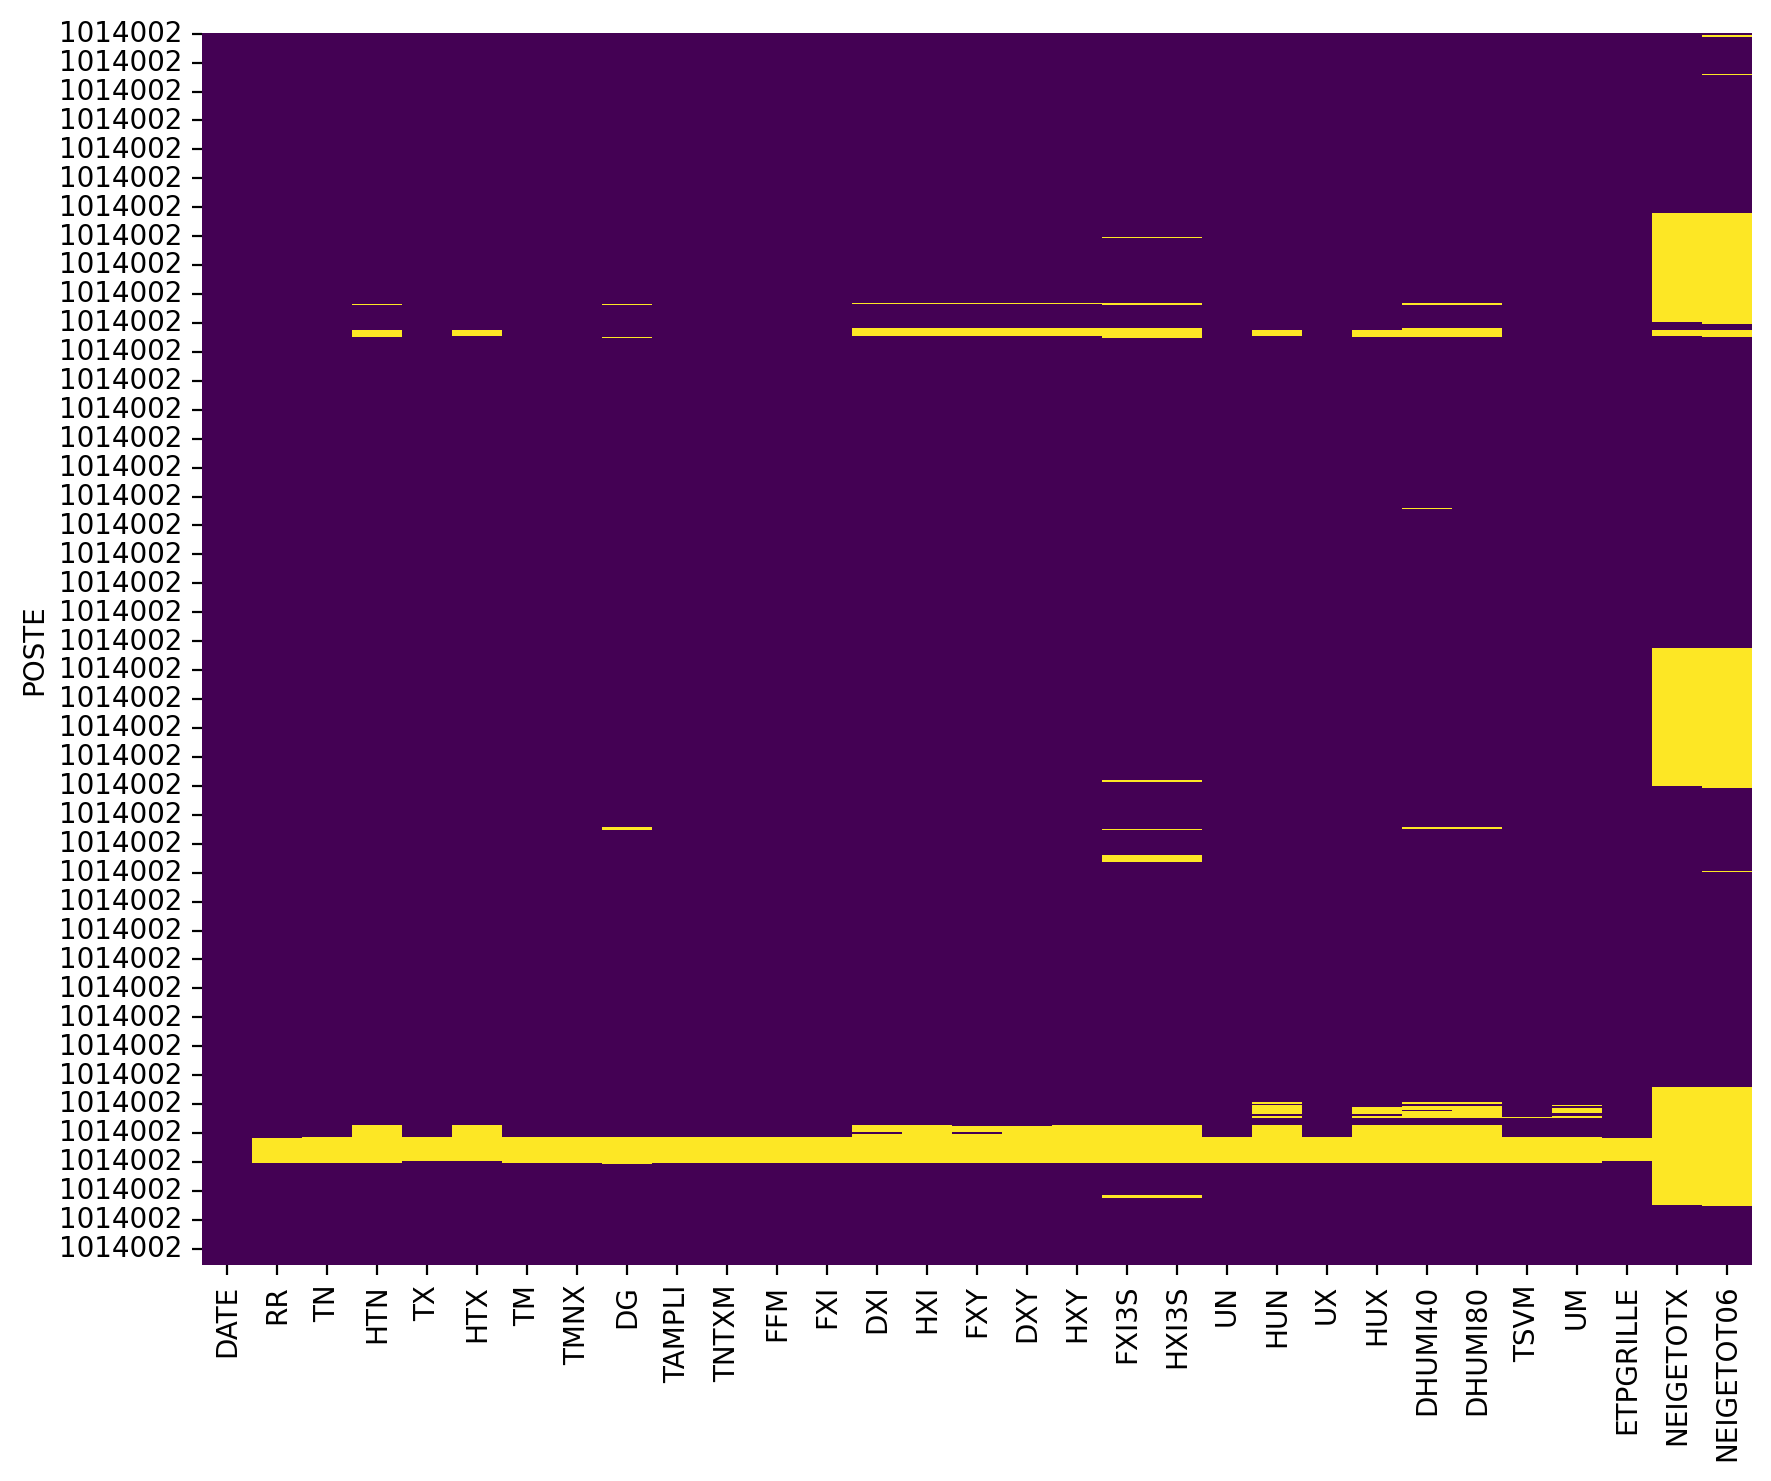

In [7]:
# Création de la heatmap des valeurs manquantes dans la base df_cleaned
plt.figure(figsize=(10,8))
sns.heatmap(df_cleaned.isnull(), cbar=False, cmap='viridis')

Après avoir supprimé toutes les variables n ayant aucune observation, on constate que les valeurs manquantes persistent chez les autres variables. On va donc procéder à l'imputation de ces valeurs manuantes.

In [8]:
# Vérification des variables avec des valeurs manquantes dans le dataframe
missing_data = df_cleaned.isnull().sum()

# Filtrer les variables ayant des valeurs manquantes
missing_data = missing_data[missing_data > 0]

# Afficher les variables ayant des valeurs manquantes et le nombre de valeurs manquantes
print(missing_data)

RR             20
TN             21
HTN            38
TX             20
HTX            35
TM             21
TMNX           21
DG             26
TAMPLI         21
TNTXM          21
FFM            21
FXI            21
DXI            37
HXI            38
FXY            36
DXY            37
HXY            38
FXI3S          52
HXI3S          52
UN             21
HUN            47
UX             21
HUX            45
DHUMI40        52
DHUMI80        52
TSVM           22
UM             28
ETPGRILLE      19
NEIGETOTX     309
NEIGETOT06    316
dtype: int64


In [9]:
print(df_cleaned.columns.tolist())

['DATE', 'RR', 'TN', 'HTN', 'TX', 'HTX', 'TM', 'TMNX', 'DG', 'TAMPLI', 'TNTXM', 'FFM', 'FXI', 'DXI', 'HXI', 'FXY', 'DXY', 'HXY', 'FXI3S', 'HXI3S', 'UN', 'HUN', 'UX', 'HUX', 'DHUMI40', 'DHUMI80', 'TSVM', 'UM', 'ETPGRILLE', 'NEIGETOTX', 'NEIGETOT06']


On divise le data frame en 2 data frame , une contenant uniquement les variables avec valeurs manquantes et une autre avec des variables sans valeurs manquantes.

In [10]:
# Identifier les colonnes avec des valeurs manquantes
missing_columns = missing_data.index.tolist()

# Ajouter les colonnes 'postes' et 'dates' si elles ne sont pas déjà dans missing_columns
important_columns = ['DATE']
for col in important_columns:
    if col not in missing_columns:
        missing_columns.append(col)

# Créer le premier dataframe contenant les colonnes avec valeurs manquantes ('dates')
df_with_missing = df_cleaned[missing_columns]

# Créer le second dataframe contenant les colonnes sans valeurs manquantes ('dates')
df_clean_columns = [col for col in df_cleaned.columns if col not in missing_data.index or col in important_columns]
df_clean = df_cleaned[df_clean_columns]

# Affichage des résultats pour validation
print("Colonnes avec valeurs manquantes et colonnes importantes:", df_with_missing.columns.tolist())
print("Colonnes sans valeurs manquantes et colonnes importantes:", df_clean.columns.tolist())


Colonnes avec valeurs manquantes et colonnes importantes: ['RR', 'TN', 'HTN', 'TX', 'HTX', 'TM', 'TMNX', 'DG', 'TAMPLI', 'TNTXM', 'FFM', 'FXI', 'DXI', 'HXI', 'FXY', 'DXY', 'HXY', 'FXI3S', 'HXI3S', 'UN', 'HUN', 'UX', 'HUX', 'DHUMI40', 'DHUMI80', 'TSVM', 'UM', 'ETPGRILLE', 'NEIGETOTX', 'NEIGETOT06', 'DATE']
Colonnes sans valeurs manquantes et colonnes importantes: ['DATE']


On constate donc que toutes les autres variables possèdent des valeurs manquantes, d'ou on n'a pas vraiment intéret à séparer le data frame comme on l'a fait.

A présent nous allons passer à l'imputation; et avant cela, nous allons arranger le format de ces variables réelles qui étaient sous le format object.

In [ ]:
# Fonction pour convertir les chaînes avec des virgules en float
def convertir_virgule_en_float(serie):
    return f.pd.to_numeric(serie.str.replace(",", ".", regex=False), errors="coerce")

# Liste des colonnes à traiter
colonnes_a_corriger = ['RR', 'TN', 'TX', 'TM', 'TMNX', 'TAMPLI', 'TNTXM', 'FFM', 'FXI', 'FXY', 'FXI3S', 'TSVM']

# Application de la fonction sur les colonnes concernées
df_with_missing[colonnes_a_corriger] = df_with_missing[colonnes_a_corriger].apply(convertir_virgule_en_float)

In [20]:
# Sélectionner uniquement les variables quantitatives
quant_var = df_with_missing.select_dtypes(include=['int64', 'float64'])
quant_var.columns

Index(['RR', 'TN', 'HTN', 'TX', 'HTX', 'TM', 'TMNX', 'DG', 'TAMPLI', 'TNTXM',
       'FFM', 'FXI', 'DXI', 'HXI', 'FXY', 'DXY', 'HXY', 'FXI3S', 'HXI3S', 'UN',
       'HUN', 'UX', 'HUX', 'DHUMI40', 'DHUMI80', 'TSVM', 'UM', 'NEIGETOTX',
       'NEIGETOT06', 'DATE'],
      dtype='object')

In [21]:
# Sélectionner uniquement les variables qualitatives
qual_var = df_with_missing.select_dtypes(include=['object'])
qual_var.columns

Index(['ETPGRILLE'], dtype='object')

Après avoir rendu toutes ces variables quantitatives comme prévu, on peut actuellement passer à l'imputation de nos variables.

In [24]:
from sklearn.impute import SimpleImputer

# Définir les colonnes quantitatives
quantitative_columns = df_with_missing.select_dtypes(include=['float64', 'int64']).columns

# Initialiser l'imputeur avec la stratégie "médiane"
imputer = SimpleImputer(strategy='median')

# Appliquer l'imputation
df_with_missing[quantitative_columns] = imputer.fit_transform(df_with_missing[quantitative_columns])

# Vérifier que toutes les valeurs manquantes ont été imputées
print(df_with_missing[quantitative_columns].isnull().sum())



RR            0
TN            0
HTN           0
TX            0
HTX           0
TM            0
TMNX          0
DG            0
TAMPLI        0
TNTXM         0
FFM           0
FXI           0
DXI           0
HXI           0
FXY           0
DXY           0
HXY           0
FXI3S         0
HXI3S         0
UN            0
HUN           0
UX            0
HUX           0
DHUMI40       0
DHUMI80       0
TSVM          0
UM            0
NEIGETOTX     0
NEIGETOT06    0
DATE          0
dtype: int64
